In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

In [18]:
data_events = pd.read_csv("Data_eventsID.csv", delimiter="|")
purchase_events = pd.read_csv("Purchase_events_ID.csv", delimiter="|")


In [19]:
data_events

,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,PROMOTION_PRICE,PRODUCT_TYPE,DEVICE_INFO_BRAND,DEVICE_INFO_TYPE,DEVICE_INFO_BROWSER,USER_SALES_GROUP,USER_SEGMENT,USER_SALES_DISTRICT,USER_PROMOTIONS_ALLOWED,EVENT
0,2022-04-05T07:41:24.017Z,6.4284,292477,89931,"1,112,071,060",1,NaN,Purchase List,Recommended Products,8.0,NaN,Bestellijst,(Windows) PC,COMPUTER,Chrome 99.0.4844.84,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW
1,2022-04-05T07:41:23.263Z,6.9300,631370,89931,"1,112,161,140",1,NaN,Purchase List,Recommended Products,6.0,NaN,Bestellijst,(Windows) PC,COMPUTER,Chrome 99.0.4844.84,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW
2,2022-04-05T14:03:01.086Z,14.0976,475439,89931,"1,051,251,010",1,NaN,Purchase List,Recommended Products,3.0,NaN,Bestellijst,(Windows) PC,COMPUTER,Chrome 99.0.4844.84,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW
3,2022-04-05T14:09:29.678Z,14.0976,475439,89931,"1,051,251,010",1,NaN,Purchase List,Recommended Products,3.0,NaN,Bestellijst,(Windows) PC,COMPUTER,Chrome 99.0.4844.84,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW
4,2022-04-05T07:41:22.020Z,14.0976,475439,89931,"1,051,251,010",1,NaN,Purchase List,Recommended Products,3.0,NaN,Bestellijst,(Windows) PC,COMPUTER,Chrome 99.0.4844.84,Rest. dag/avondkaart,restauratief,Nieuwegein,1,VIEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959368,2022-03-06T15:17:48.627Z,9.3588,956134,986605,"1,061,261,431",349969,NaN,NaN,NaN,NaN,NaN,NaN,(Windows) PC,COMPUTER,Chrome 98.0.4758.102,Restaur. dagkaart,restauratief,Nieuwegein,1,ADD_TO_CARD
9959369,2022-03-06T14:30:42.842Z,131.9604,211104,986605,"1,101,761,030",349969,NaN,NaN,NaN,NaN,NaN,NaN,(Windows) PC,COMPUTER,Chrome 98.0.4758.102,Restaur. dagkaart,restauratief,Nieuwegein,1,ADD_TO_CARD
9959370,2022-03-06T16:52:28.600Z,15.4308,5611,986605,"1,112,071,040",349969,NaN,NaN,NaN,NaN,NaN,NaN,(Windows) PC,COMPUTER,Chrome 98.0.4758.102,Restaur. dagkaart,restauratief,Nieuwegein,1,ADD_TO_CARD
9959371,2022-03-06T15:18:05.661Z,16.0512,56378,986605,"1,081,531,502",349969,NaN,NaN,NaN,NaN,NaN,NaN,(Windows) PC,COMPUTER,Chrome 98.0.4758.102,Restaur. dagkaart,restauratief,Nieuwegein,1,ADD_TO_CARD


In [20]:
data_events.dtypes

TIMESTAMP_EVENT             object
PRICE                      float64
PROPOSITION                  int64
USER_CLIENT_NUMBER           int64
ARTICLE_CATEGORIE           object
USER_SESSION_ID              int64
PROMOTION_LABEL             object
PAGE_NAME                   object
PAGE_SECTION                object
PAGE_SECTION_POSITION      float64
PROMOTION_PRICE            float64
PRODUCT_TYPE                object
DEVICE_INFO_BRAND           object
DEVICE_INFO_TYPE            object
DEVICE_INFO_BROWSER         object
USER_SALES_GROUP            object
USER_SEGMENT                object
USER_SALES_DISTRICT         object
USER_PROMOTIONS_ALLOWED      int64
EVENT                       object
dtype: object

In [21]:
data_events['PRODUCT_TYPE']

0          Bestellijst
1          Bestellijst
2          Bestellijst
3          Bestellijst
4          Bestellijst
              ...     
9959368            NaN
9959369            NaN
9959370            NaN
9959371            NaN
9959372            NaN
Name: PRODUCT_TYPE, Length: 9959373, dtype: object

In [14]:
data_events['PRODUCT_TYPE'].unique()

array(['Bestellijst', nan, 'Meepakker', 'Kassakoopje'], dtype=object)

In [11]:
data_events['USER_SEGMENT'].unique()

array(['restauratief', 'zorg', 'fastservice', 'catering', 'none'],
      dtype=object)

In [33]:
data_events['PROMOTION_LABEL'].unique()

array([nan, '20% korting', 'Actie', '20%25%20korting', '40%25%20korting',
       '40% korting', 'WOW!!!', 'Actieprijs', '15% korting',
       '25% korting', '50% korting', '30% korting', '25%25%20korting',
       '30%25%20korting', '10% korting'], dtype=object)

In [36]:
data_events['PAGE_SECTION'].unique()

# ASSUMPTION1: "nan" in PAGE_SECTION is not recommendated

array(['Recommended Products', nan], dtype=object)

In [44]:
data_events['PAGE_SECTION'] = data_events['PAGE_SECTION'].fillna('not recommended')

# Verify the replacement by checking for any remaining NaN values or by viewing the updated unique values
print(data_events['PAGE_SECTION'].unique())

['Recommended Products' 'not recommended']


In [9]:
# missing values in data_events

missing_values = data_events.isnull().sum()
print(missing_values)


TIMESTAMP_EVENT                  0
PRICE                       218032
PROPOSITION                      0
USER_CLIENT_NUMBER               0
ARTICLE_CATEGORIE                0
USER_SESSION_ID                  0
PROMOTION_LABEL            8730898
PAGE_NAME                  6405942
PAGE_SECTION               6405942
PAGE_SECTION_POSITION      6403293
PROMOTION_PRICE            8727136
PRODUCT_TYPE               6406879
DEVICE_INFO_BRAND                0
DEVICE_INFO_TYPE                 0
DEVICE_INFO_BROWSER              0
USER_SALES_GROUP              7897
USER_SEGMENT                     0
USER_SALES_DISTRICT           5136
USER_PROMOTIONS_ALLOWED          0
EVENT                            0
dtype: int64


In [8]:
# missing values in purchase_events

missing_values = purchase_events.isnull().sum()
print(missing_values)

PROPOSITION           0
USER_CLIENT_NUMBER    0
DATE                  0
AMOUNT                0
dtype: int64


Product-related Features:  product ID (PROPOSITION), product category (ARTICLE_CATEGORIE), the location on the page where the product was recommended (PAGE_NAME, PAGE_SECTION, PAGE_SECTION_POSITION), product type (PRODUCT_TYPE), price information (PRICE, PROMOTION_PRICE), and promotion details (PROMOTION_LABEL).


User-related Features: DEVICE_INFO_BRAND, DEVICE_INFO_TYPE, DEVICE_INFO_BROWSER), user segmentation (USER_SALES_GROUP, USER_SEGMENT, USER_SALES_DISTRICT, and whether the user is eligible for promotions (USER_PROMOTIONS_ALLOWED).

EVENT could be the outcome variable. classification problem

In [9]:
unmatched_propositions = purchase_events[~purchase_events['PROPOSITION'].isin(data_events['PROPOSITION'])]
print(f"Unmatched propositions in purchase_events: {unmatched_propositions}")

# Similarly, check the other way around
unmatched_propositions = data_events[~data_events['PROPOSITION'].isin(purchase_events['PROPOSITION'])]
print(f"Unmatched propositions in data_events: {unmatched_propositions}")

Unmatched propositions in purchase_events:           PROPOSITION  USER_CLIENT_NUMBER                 DATE   AMOUNT
0              170618              308685  2021-10-21 00:00:00   576.44
1              170618              308685  2022-04-01 00:00:00   250.43
2              170618              308685  2022-03-01 00:00:00  1275.91
3              170618              630340  2021-12-08 00:00:00   142.71
4              170618              630340  2022-04-22 00:00:00   723.65
...               ...                 ...                  ...      ...
15489825       898568               13319  2022-04-26 00:00:00     9.24
15489826       898568              875845  2022-03-22 00:00:00    26.37
15489827       898568              812813  2021-11-25 00:00:00  1897.74
15489828       898568              506305  2022-01-17 00:00:00  -873.92
15489829       898568              506305  2022-03-08 00:00:00   873.92

[396767 rows x 4 columns]
Unmatched propositions in data_events:                   TIMESTAMP

In [9]:
numerical_data = data_events.select_dtypes(include=['int64', 'float64'])
categorical_data = data_events.select_dtypes(include=['object'])

In [16]:
numerical_data.columns

Index(['PRICE', 'PROPOSITION', 'USER_CLIENT_NUMBER', 'USER_SESSION_ID',
       'PAGE_SECTION_POSITION', 'PROMOTION_PRICE', 'USER_PROMOTIONS_ALLOWED'],
      dtype='object')

In [15]:
categorical_data.columns

Index(['TIMESTAMP_EVENT', 'ARTICLE_CATEGORIE', 'PROMOTION_LABEL', 'PAGE_NAME',
       'PAGE_SECTION', 'PRODUCT_TYPE', 'DEVICE_INFO_BRAND', 'DEVICE_INFO_TYPE',
       'DEVICE_INFO_BROWSER', 'USER_SALES_GROUP', 'USER_SEGMENT',
       'USER_SALES_DISTRICT', 'EVENT'],
      dtype='object')

In [30]:
# Summary statistics for numerical variables
data_events.describe().T


,count,mean,std,min,25%,50%,75%,max
PRICE,9741341.0,18.453544,19.180857,0.0000,6.9960,13.8996,23.2452,3706.7316
PROPOSITION,9959373.0,501578.404256,294519.742086,7.0000,237744.0000,502662.0000,765228.0000,999996.0000
USER_CLIENT_NUMBER,9959373.0,494252.408153,288969.275749,193.0000,242983.0000,491265.0000,748405.0000,999858.0000
USER_SESSION_ID,9959373.0,174936.932991,100995.591876,1.0000,87427.0000,174785.0000,262402.0000,349969.0000
PAGE_SECTION_POSITION,3556080.0,3.488094,3.177248,1.0000,1.0000,2.0000,4.0000,15.0000
PROMOTION_PRICE,1232237.0,21.229806,17.959817,0.4488,10.5468,15.7872,26.8356,1383.7428
USER_PROMOTIONS_ALLOWED,9959373.0,0.785220,0.410670,0.0000,1.0000,1.0000,1.0000,1.0000


PROPOSITION, USER_CLIENT_NUMBER, USER_SESSION_ID, PAGE_SECTION_POSITION, USER_PROMOTIONS_ALLOWED are not numerical data

In [29]:
# Summary statistics for categorical variables
data_events.describe(include='object').T

,count,unique,top,freq
TIMESTAMP_EVENT,9959373,9745464,2022-02-09T14:11:05.550Z,5
ARTICLE_CATEGORIE,9959373,1033,"1,031,161,221",229054
PROMOTION_LABEL,1228475,14,20%25%20korting,624092
PAGE_NAME,3553431,3,Shopping Cart,2309356
PAGE_SECTION,3553431,1,Recommended Products,3553431
PRODUCT_TYPE,3552494,3,Meepakker,1773926
DEVICE_INFO_BRAND,9959373,10,(Windows) PC,6268715
DEVICE_INFO_TYPE,9959373,3,COMPUTER,7804033
DEVICE_INFO_BROWSER,9959373,409,Stock Browser,1033570
USER_SALES_GROUP,9951476,64,Rest. dag/avondkaart,2737181


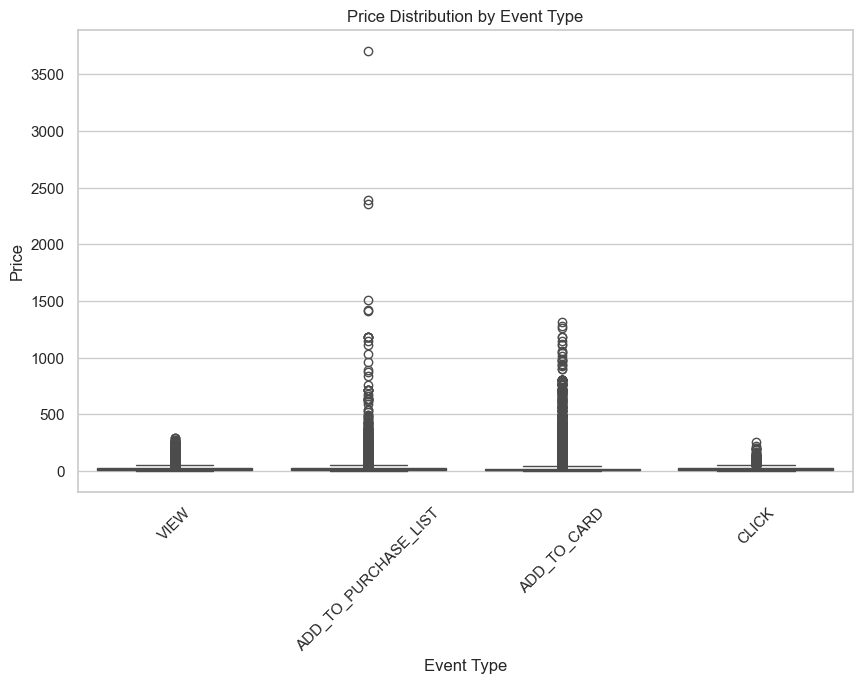

In [17]:
# Price Distribution by Event Type (countinuous variables)

plt.figure(figsize=(10, 6))
sns.boxplot(x='EVENT', y='PRICE', data=data_events)
plt.title('Price Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

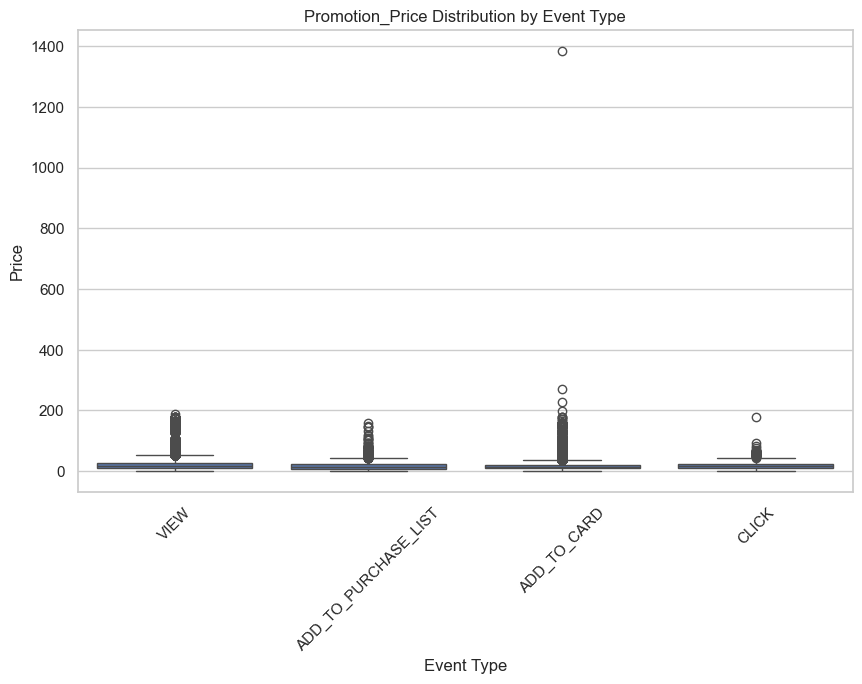

In [18]:
# Price Distribution by Event Type (countinuous variables)

plt.figure(figsize=(10, 6))
sns.boxplot(x='EVENT', y='PROMOTION_PRICE', data=data_events)
plt.title('Promotion_Price Distribution by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Summary Statistics for Price and Promotion Price:
              PRICE  PROMOTION_PRICE
count  9.741341e+06     1.232237e+06
mean   1.845354e+01     2.122981e+01
std    1.918086e+01     1.795982e+01
min    0.000000e+00     4.488000e-01
25%    6.996000e+00     1.054680e+01
50%    1.389960e+01     1.578720e+01
75%    2.324520e+01     2.683560e+01
max    3.706732e+03     1.383743e+03

Correlation between Price and Promotion Price:
0.9772202479358626


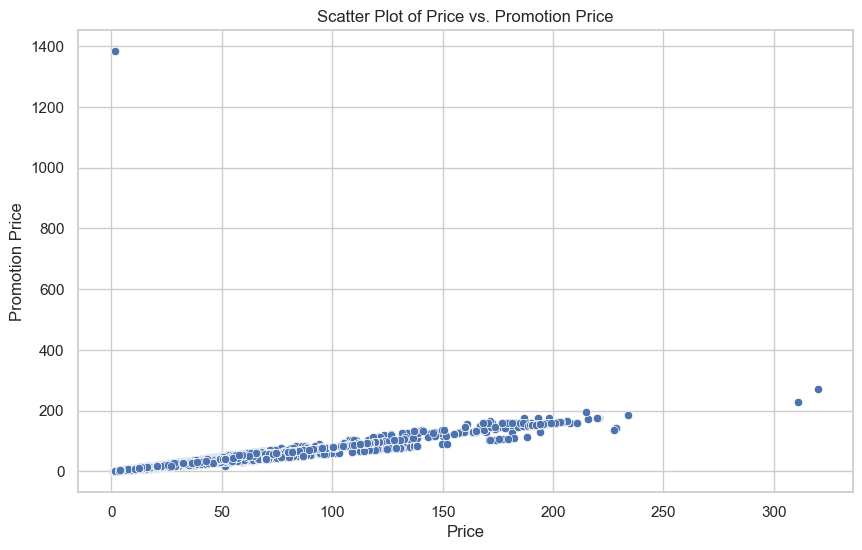

In [21]:
# price vs. promotion price
# 1. Summary Statistics
print("Summary Statistics for Price and Promotion Price:")
print(data_events[['PRICE', 'PROMOTION_PRICE']].describe())

# 2. Correlation Analysis
correlation = data_events['PRICE'].corr(data_events['PROMOTION_PRICE'])
print("\nCorrelation between Price and Promotion Price:")
print(correlation)

# 3. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='PROMOTION_PRICE', data=data_events)
plt.title('Scatter Plot of Price vs. Promotion Price')
plt.xlabel('Price')
plt.ylabel('Promotion Price')
plt.grid(True)
plt.show()

In [28]:
len(data_events['ARTICLE_CATEGORIE'].unique())

1033

In [15]:
# price distribution based on product category
if data_events['ARTICLE_CATEGORIE'].isnull().any():
    print("Missing values found in 'ARTICLE_CATEGORIE'")
else:
    print("No missing values in 'ARTICLE_CATEGORIE'.")


grouped_prices = data_events.groupby('ARTICLE_CATEGORIE')['PRICE'].describe()
print("\nDescriptive Statistics for Price by Article Category:")
print(grouped_prices)





No missing values in 'ARTICLE_CATEGORIE'.

Descriptive Statistics for Price by Article Category:
                     count       mean        std      min      25%      50%  \
ARTICLE_CATEGORIE                                                             
1,011,011,035        208.0   7.671992   9.140821   1.6500   4.5540   4.5540   
1,011,011,041        649.0  36.511200  14.582702  20.3412  26.5980  36.4980   
1,011,011,103       1122.0  32.382859  10.952644  15.1536  26.8488  30.5580   
1,011,011,135       5898.0  11.579045   5.591514   1.7424   9.5040  10.1772   
1,011,011,167       1576.0  49.920306  27.395051   0.0000  34.8480  43.3092   
...                    ...        ...        ...      ...      ...      ...   
111,207            26246.0   8.009542  16.434561   0.0000   4.2240   4.4352   
111,210                1.0  50.622000        NaN  50.6220  50.6220  50.6220   
111,214             1105.0  14.529712  11.042983   3.0888   8.5668  13.9656   
111,216                4.0  12.536

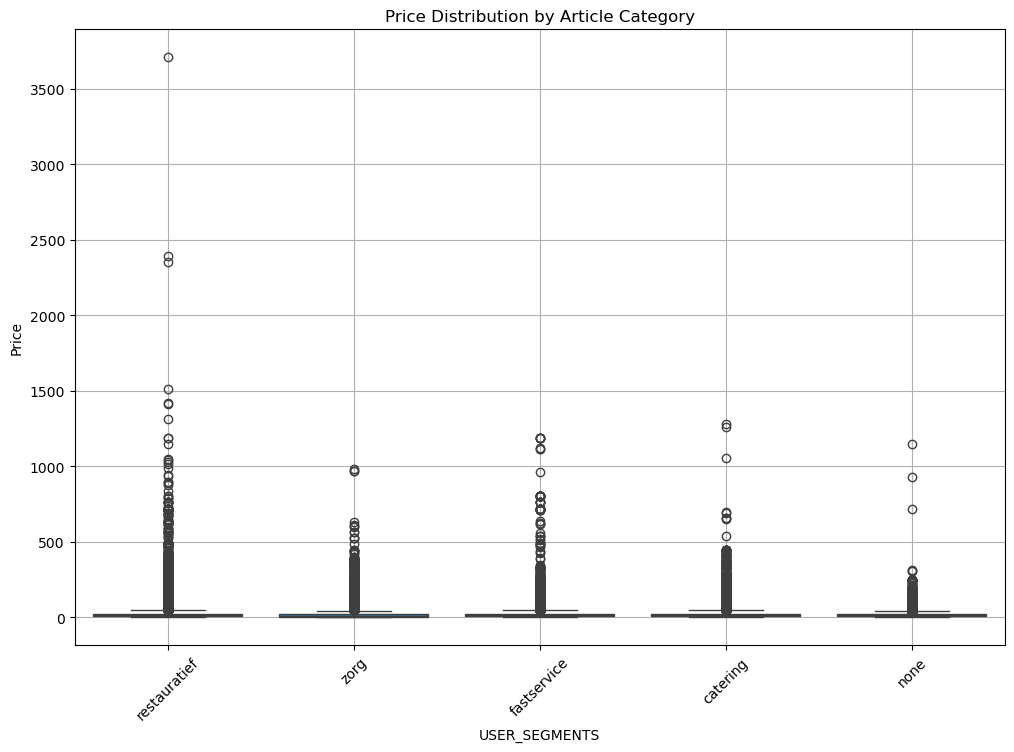

In [22]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='USER_SEGMENT', y='PRICE', data=data_events)
plt.title('Price Distribution by Article Category')
plt.xticks(rotation=45)  
plt.xlabel('USER_SEGMENTS')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Frequency Distribution for USER_SEGMENT:
USER_SEGMENT
restauratief    5364033
fastservice     1895147
catering        1648458
zorg             996575
none              55160
Name: count, dtype: int64

Frequency Distribution for EVENT:
EVENT
ADD_TO_CARD             6170623
VIEW                    3552494
ADD_TO_PURCHASE_LIST     232670
CLICK                      3586
Name: count, dtype: int64

Cross-tabulation between USER_SEGMENT and EVENT:
EVENT         ADD_TO_CARD  ADD_TO_PURCHASE_LIST  CLICK     VIEW
USER_SEGMENT                                                   
catering          1074596                 39444    696   533722
fastservice       1257725                 34860    426   602136
none                32833                  1790     24    20513
restauratief      3246026                138226   2103  1977678
zorg               559443                 18350    337   418445


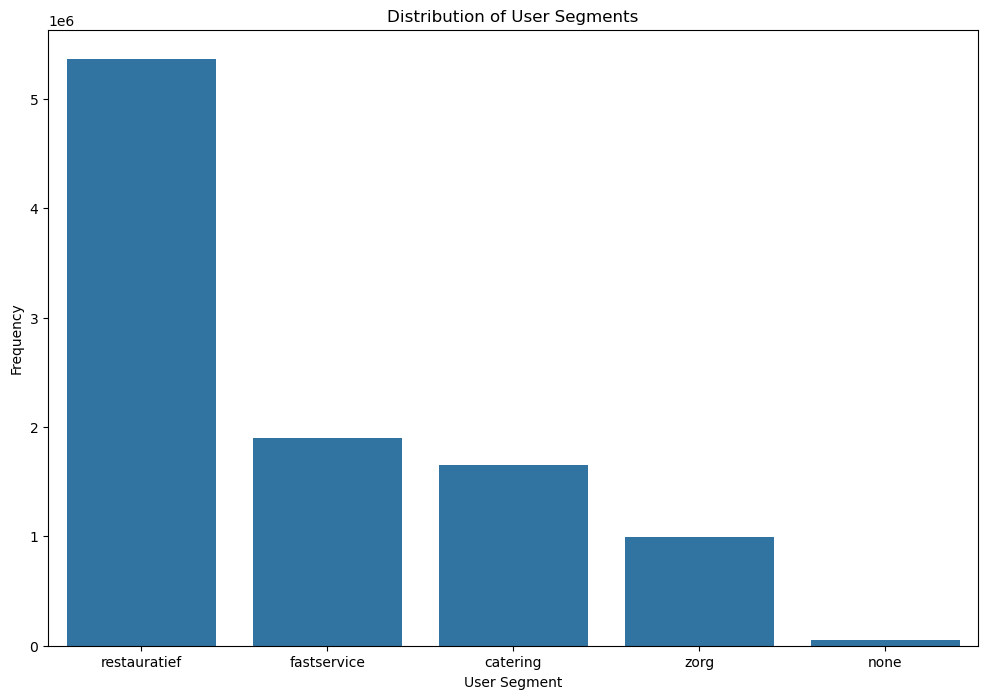

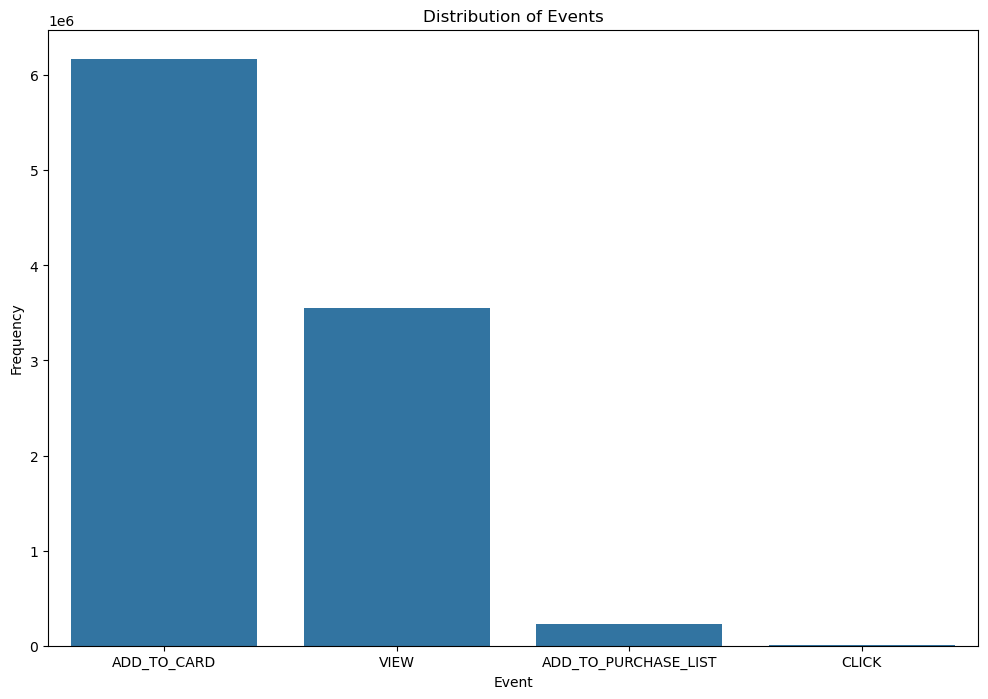

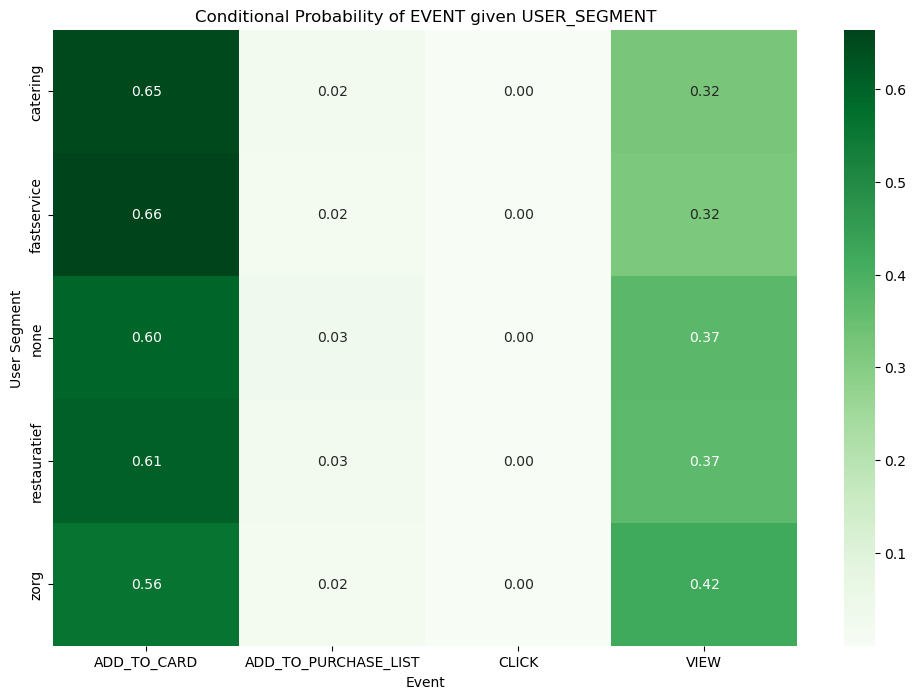

In [28]:
# 1. Frequency Distribution
user_segment_counts = data_events['USER_SEGMENT'].value_counts()
event_counts = data_events['EVENT'].value_counts()

print("Frequency Distribution for USER_SEGMENT:")
print(user_segment_counts)
print("\nFrequency Distribution for EVENT:")
print(event_counts)

# 2. Cross-Tabulation
crosstab = pd.crosstab(data_events['USER_SEGMENT'], data_events['EVENT'])
print("\nCross-tabulation between USER_SEGMENT and EVENT:")
print(crosstab)

# 3. Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=user_segment_counts.index, y=user_segment_counts.values)
plt.title('Distribution of User Segments')
plt.xlabel('User Segment')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Distribution of Events')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.show()



prob_table = crosstab.div(crosstab.sum(axis=1), axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(prob_table, annot=True, cmap="Greens", fmt=".2f")
plt.title('Conditional Probability of EVENT given USER_SEGMENT')
plt.xlabel('Event')
plt.ylabel('User Segment')
plt.show()

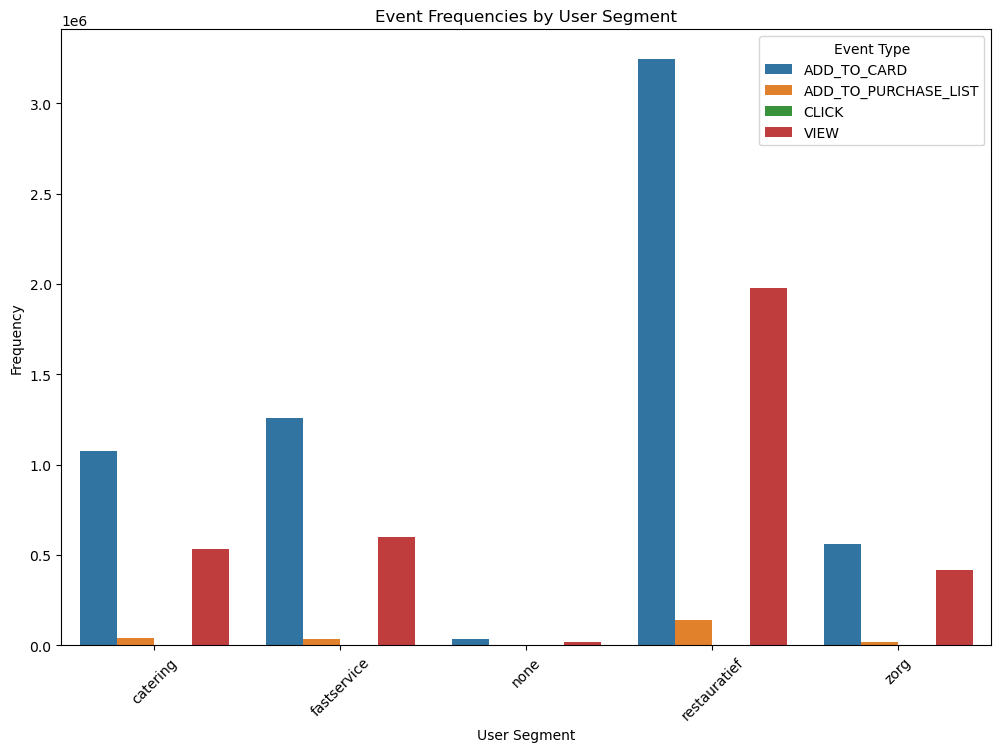

In [27]:


# Given cross-tabulation data setup as a dictionary
data = {
    'ADD_TO_CARD': [1074596, 1257725, 32833, 3246026, 559443],
    'ADD_TO_PURCHASE_LIST': [39444, 34860, 1790, 138226, 18350],
    'CLICK': [696, 426, 24, 2103, 337],
    'VIEW': [533722, 602136, 20513, 1977678, 418445]
}

index = ['catering', 'fastservice', 'none', 'restauratief', 'zorg']

# Creating DataFrame
df = pd.DataFrame(data, index=index)

# Melting the DataFrame to make it suitable for seaborn's barplot
df_reset = df.reset_index()
melted_df = pd.melt(df_reset, id_vars='index', value_vars=['ADD_TO_CARD', 'ADD_TO_PURCHASE_LIST', 'CLICK', 'VIEW'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='value', hue='variable', data=melted_df)
plt.title('Event Frequencies by User Segment')
plt.xlabel('User Segment')
plt.ylabel('Frequency')
plt.legend(title='Event Type')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()



Cross-tabulation between EVENT and USER_PROMOTIONS_ALLOWED:
USER_PROMOTIONS_ALLOWED        0        1
EVENT                                    
ADD_TO_CARD              1455792  4714831
ADD_TO_PURCHASE_LIST       42034   190636
CLICK                        541     3045
VIEW                      640711  2911783

Chi-Square Test results:
Chi-Square statistic: 43011.573688835895
P-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
 [[1.32532880e+06 4.84529420e+06]
 [4.99729529e+04 1.82697047e+05]
 [7.70202472e+02 2.81579753e+03]
 [7.63006041e+05 2.78948796e+06]]


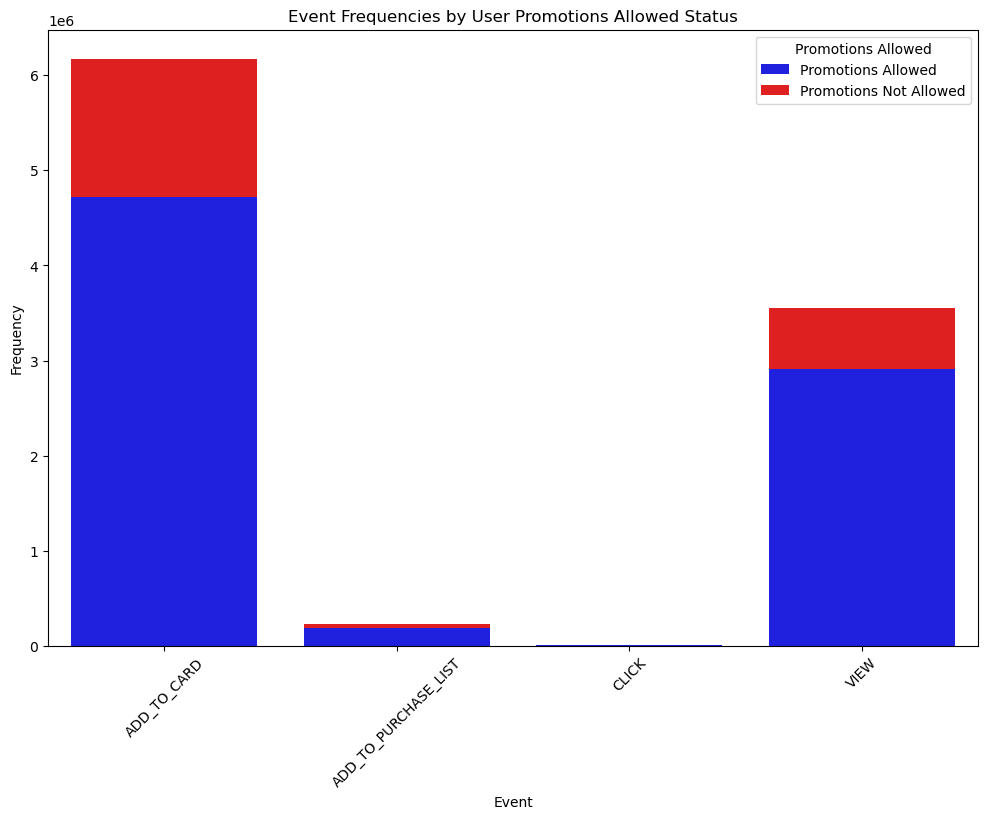

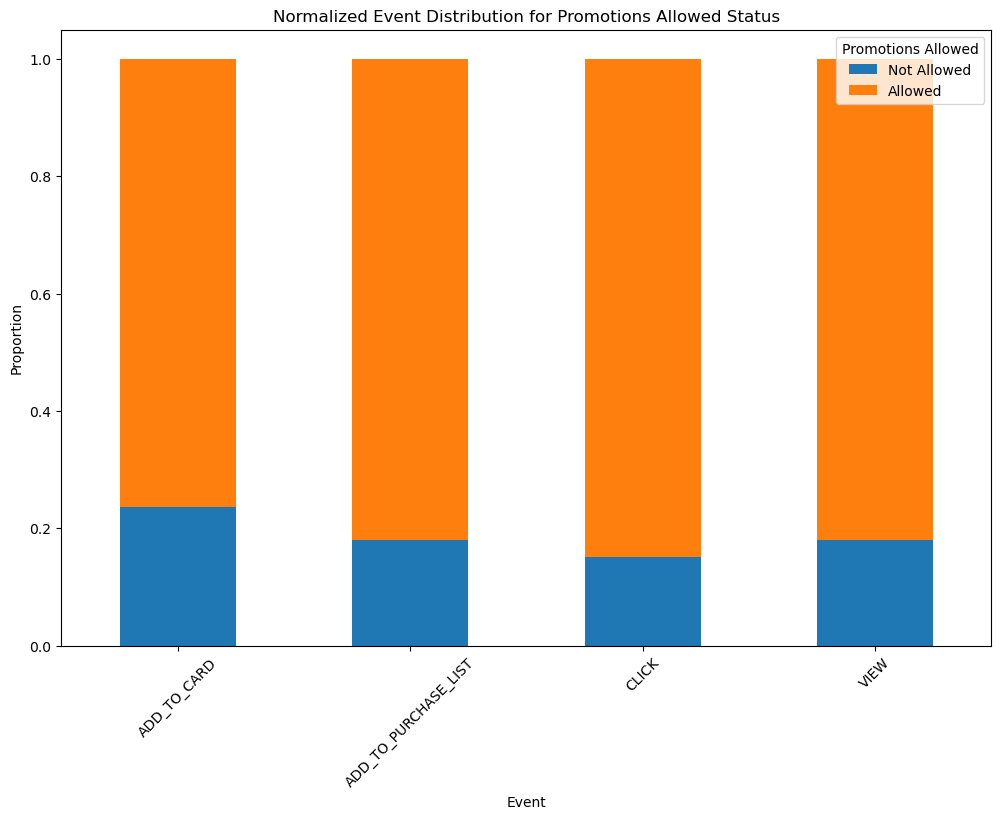

In [29]:
# promotion has impact on the outcome variable(event)
# 1. Cross-Tabulation
crosstab = pd.crosstab(data_events['EVENT'], data_events['USER_PROMOTIONS_ALLOWED'])
print("\nCross-tabulation between EVENT and USER_PROMOTIONS_ALLOWED:")
print(crosstab)

# 2. Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"\nChi-Square Test results:")
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n {expected}")

# 3. Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=crosstab.index, y=crosstab[1], color='blue', label='Promotions Allowed')
sns.barplot(x=crosstab.index, y=crosstab[0], bottom=crosstab[1], color='red', label='Promotions Not Allowed')
plt.title('Event Frequencies by User Promotions Allowed Status')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.legend(title='Promotions Allowed')
plt.xticks(rotation=45)
plt.show()

# 4. Normalized Bar Plot
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Normalized Event Distribution for Promotions Allowed Status')
plt.xlabel('Event')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Promotions Allowed', labels=['Not Allowed', 'Allowed'])
plt.show()

<Figure size 1200x800 with 0 Axes>

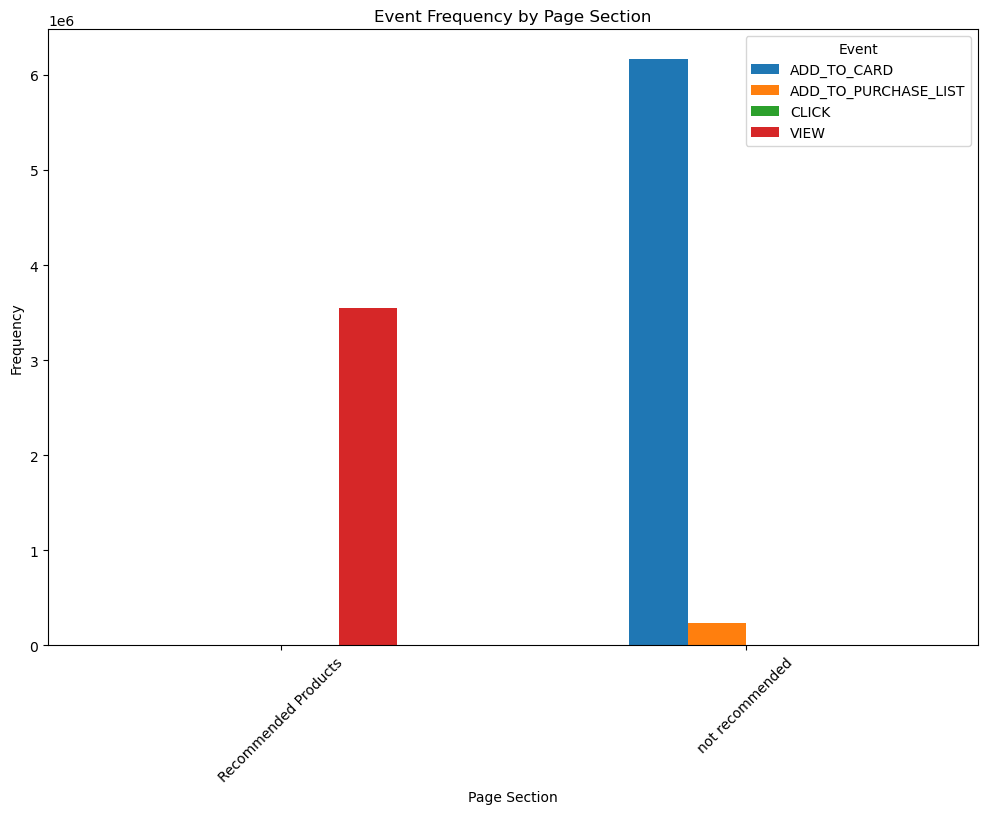

In [46]:
# Creating a Cross-Tabulation
crosstab = pd.crosstab(data_events['PAGE_SECTION'], data_events['EVENT'])

# Plotting a Clustered Bar Chart
plt.figure(figsize=(12, 8))
crosstab.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Event Frequency by Page Section')
plt.xlabel('Page Section')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Event')
plt.show()

<Figure size 1400x1000 with 0 Axes>

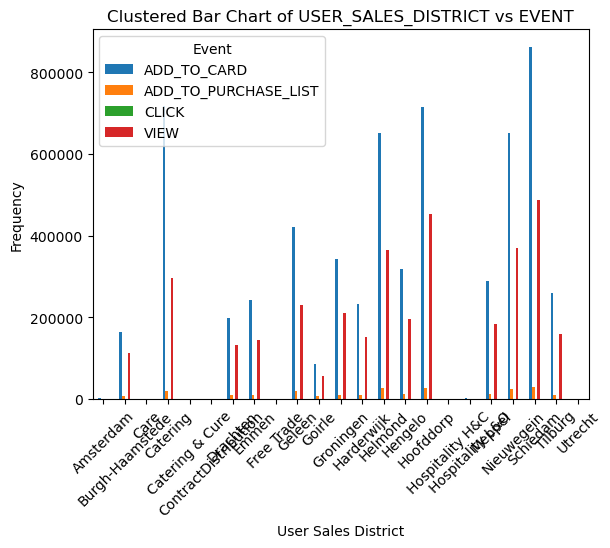

<Figure size 1400x1000 with 0 Axes>

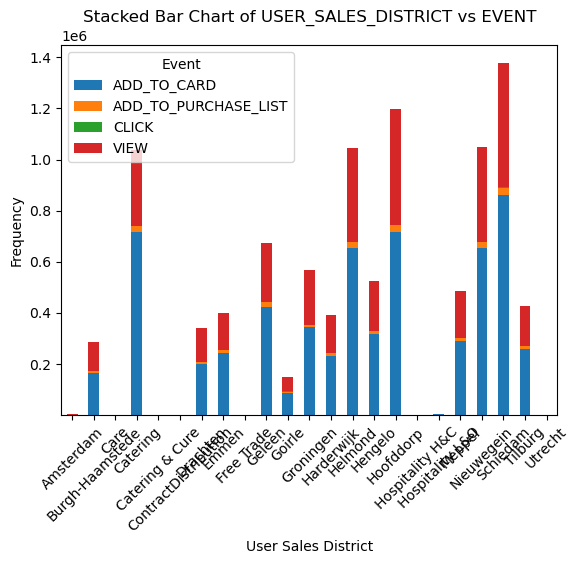

In [41]:
# Crosstab for visualization
crosstab = pd.crosstab(data_events['USER_SALES_DISTRICT'], data_events['EVENT'])

# 1. Clustered Bar Chart
plt.figure(figsize=(14, 10))
crosstab.plot(kind='bar', stacked=False)
plt.title('Clustered Bar Chart of USER_SALES_DISTRICT vs EVENT')
plt.xlabel('User Sales District')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Event')
plt.show()

# 2. Stacked Bar Chart
plt.figure(figsize=(14, 10))
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of USER_SALES_DISTRICT vs EVENT')
plt.xlabel('User Sales District')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Event')
plt.show()


promotion-label: action
user-district: CONTEXT
page-section:action